In [64]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import turicreate as tc
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [61]:
house_data = pd.read_csv('kc_house_data.csv')
test_house_data = pd.read_csv('kc_house_test_data.csv')
train_house_data = pd.read_csv('kc_house_train_data.csv')
sf = tc.SFrame('m_1ce96d9d245ca490.frame_idx')

In [7]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
sf.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [9]:
train_data,test_data = sf.random_split(.8,seed=0)

In [10]:
house_model_tc = tc.linear_regression.create(sf, target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 20532

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.194763     | 4368709.134239     | 2167359.282525       | 262051.291674                   | 249576.771142                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

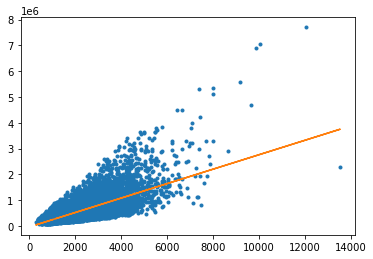

In [11]:
plt.plot(sf['sqft_living'],sf['price'],'.',
        sf['sqft_living'], house_model_tc.predict(sf),'-')

In [12]:
house_model_tc.coefficients

name,index,value,stderr
(intercept),None,-42317.43941182457,4523.709996308264
sqft_living,None,279.96749420519103,1.9883668899395746


In [19]:
house_model_tc.evaluate(train_data)

NameError: name 'training_data' is not defined

In [40]:
def simple_linear_regression(input_feature, output):
    slope = 0
    
    sum_x = np.sum(input_feature)
    sum_y = np.sum(output)
    sum_xy = np.sum(np.multiply(input_feature, output))
    sum_x2 = np.sum(np.multiply(input_feature,input_feature))
    N = len(input_feature)
    slope = (sum_xy - (sum_y*sum_x)/N)/(sum_x2 - (sum_x*sum_x)/N)
    intercept = sum_y/N - (slope * sum_x)/N
    
    return(intercept, slope)

In [24]:
input_feature = train_data['sqft_living']
output = train_data['price']

In [57]:
input_f = np.array(input_feature, dtype='float64')
outp = np.array(output, dtype='float64')
rooms = np.array(train_data['bedrooms'], dtype='float64')

In [58]:
squarefeet_intercept, squarfeet_slope = simple_linear_regression(input_f, outp)
room_inter, room_slope = simple_linear_regression(rooms, outp)

In [44]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + np.multiply(input_feature, slope)
    return(predicted_output)

In [59]:
p_o = get_regression_predictions(input_f, squarefeet_intercept, squarfeet_slope)
p_o_rooms = get_regression_predictions(rooms, room_inter, room_slope)

In [46]:
Quiz1 = get_regression_predictions(2650, squarefeet_intercept, squarfeet_slope)
print(Quiz1)

700074.8456294581


In [49]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    RSS = np.sum(np.square(output - (intercept + np.multiply(slope, input_feature))))
    return(RSS)

In [60]:
RSS = get_residual_sum_of_squares(input_f, outp, squarefeet_intercept, squarfeet_slope)
print("%5.3E" % RSS)
RSS2 = get_residual_sum_of_squares(rooms, outp, room_inter, room_slope)
print("%5.3E" % RSS2)

1.202E+15
2.143E+15


In [54]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_input = np.divide((output - intercept), slope)
    return(estimated_input)

In [56]:
es_input = inverse_regression_predictions(800000, squarefeet_intercept, squarfeet_slope)
print(es_input)

3004.396247615945


In [77]:
simple_reg_model = linear_model.LinearRegression()
x_feature = np.array(train_house_data['sqft_living'])
x_feature = x_feature.reshape(-1,1)
y_feature = train_house_data['price']
price_sqft_model = simple_reg_model.fit(x_feature, y_feature)

In [80]:
x_test = np.array(test_house_data['sqft_living']).reshape(-1,1)
y_test = price_sqft_model.predict(x_test)

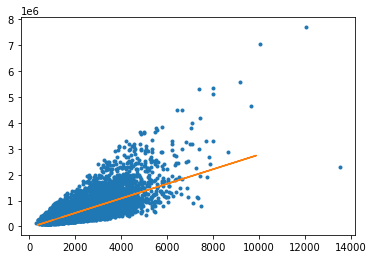

In [81]:
plt.plot(x_feature, y_feature, '.',
        x_test, y_test, '-')

In [83]:
price_sqft_model.score(x_feature, y_feature)

0.49409140136495416